In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 중복 처리

In [2]:
wine = pd.read_csv('winequality-red.csv')
df = wine.copy()
df1 = df.drop_duplicates()

# 이상치 처리

### 1. 이상치가 아니지만 주관적으로 판단하여 이상치를 정상 범주에 넣은 변수
- fixed acidity

- volatile acidity

- residual sugar

- total sulfur dioxide

- sulphates

In [3]:
# 각 열에 대한 임계값 및 상한값 딕셔너리 정의
criteria = {
    'fixed acidity': 12.9,
    'volatile acidity': 1.04,
    'residual sugar': 6.6,
    'total sulfur dioxide': 149.0,
    'sulphates': 1.09
}

In [4]:
# 산점도를 그릴 열 선택
selected_columns = ['fixed acidity', 'volatile acidity', 'residual sugar',
                    'total sulfur dioxide', 'sulphates']

# 각 열에 대해 반복
for column_name in selected_columns:
    # IQR 계산
    Q1 = df1[column_name].quantile(0.25)
    Q3 = df1[column_name].quantile(0.75)
    IQR = Q3 - Q1

    # 이상치 경계 정의
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # 임계값 및 상한값 지정
    threshold = criteria[column_name]

    # 이상치에 해당하는 데이터 선택
    red_points = df1[df1[column_name] > threshold]

    # 이상치를 중앙값으로 대체
    df1.loc[red_points.index, column_name] = df1[column_name].median()
    

### 2. 주관적 판단하지 않은 이상치를 가지는 변수
- citric acid

- free sulfur dioxide

- alcohol

In [5]:
import matplotlib.pyplot as plt

# 선택할 열들
selected_columns = ['citric acid', 'free sulfur dioxide', 'alcohol']

# 반복문으로 각 열에 대한 이상치를 중앙값으로 대체하고 산점도 그리기
for column_name in selected_columns:
    # IQR 계산
    Q1 = df1[column_name].quantile(0.25)
    Q3 = df1[column_name].quantile(0.75)
    IQR = Q3 - Q1

    # 이상치 경계 정의
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # 특정 조건에 맞는 데이터 선택
    red_points = df1[df1[column_name] > upper_bound]
    blue_points = df1[df1[column_name] <= upper_bound]

    # 이상치를 중앙값으로 대체
    df1.loc[red_points.index, column_name] = df1[column_name].median()


### 3. Zscore를 통해 이상치 판별을 한 변수
- pH

- density

In [6]:
# pH

import matplotlib.pyplot as plt

# 선택한 열
column_name = 'pH'

# IQR 계산
Q1 = df1[column_name].quantile(0.25)
Q3 = df1[column_name].quantile(0.75)
IQR = Q3 - Q1

# 이상치 경계 정의
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


# 특정 조건에 맞는 데이터 선택
red_points = df1[(df1[column_name] < 2.86) | (df1[column_name] > 3.75)]
green_points = df1[(df1[column_name] > upper_bound) & (df1[column_name] <= 3.75) & (df1[column_name] >= 2.86)]
blue_points = df1[(df1[column_name] <= upper_bound) & (df1[column_name] >= lower_bound)]

# 중앙값으로 이상치 대체
df1.loc[red_points.index, column_name] = df1[column_name].median()


In [7]:
# density

import matplotlib.pyplot as plt

# 선택한 열
column_name = 'density'

# IQR 계산
Q1 = df1[column_name].quantile(0.25)
Q3 = df1[column_name].quantile(0.75)
IQR = Q3 - Q1

# 이상치 경계 정의
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


# 특정 조건에 맞는 데이터 선택
red_points = df1[(df1[column_name] < 0.9912) | (df1[column_name] > 1.0022)]
green_points = df1[(df1[column_name] >= 0.9912) & (df1[column_name] <= upper_bound) & (df1[column_name] <= 1.0022)]
blue_points = df1[(df1[column_name] <= upper_bound) & (df1[column_name] >= lower_bound)]

# 중앙값으로 이상치 대체
df1.loc[red_points.index, column_name] = df1[column_name].median()

### 4. 규칙성을 찾아 이상치 판단한 변수 
- chlorides

In [8]:
import matplotlib.pyplot as plt

# 선택한 열
column_name = 'chlorides'

# IQR 계산
Q1 = df1[column_name].quantile(0.25)
Q3 = df1[column_name].quantile(0.75)
IQR = Q3 - Q1

# 이상치 경계 정의
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 특정 조건에 맞는 데이터 선택
red_points = df1[df1[column_name] > 0.34]
green_points = df1[(df1[column_name] <= 0.038) | ((df1[column_name] >= 0.123) & (df1[column_name] <= 0.337))]
blue_points = df1[(df1[column_name] >= lower_bound) & (df1[column_name] <= upper_bound)]

# 중앙값으로 이상치 대체
df1.loc[red_points.index, column_name] = df1[column_name].median()

### * 종합하기 (df2) 

In [9]:
df2 = df1.copy()

In [10]:
df2.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.229360,0.524290,0.271788,2.382487,0.083360,15.178808,45.860559,0.996695,3.307219,0.641523,10.399595,5.623252
std,1.601798,0.172492,0.194536,0.847631,0.028314,9.144139,31.183962,0.001766,0.148374,0.128267,1.030798,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.991200,2.860000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.637500,0.430000,2.600000,0.090000,21.000000,62.000000,0.997800,3.400000,0.710000,11.100000,6.000000
max,12.900000,1.040000,0.790000,6.600000,0.337000,42.000000,149.000000,1.002200,3.750000,1.090000,13.500000,8.000000


# 왜도 첨도 계산

# 개념
- 왜도 : 데이터 분포의 비대칭 정도를 측정. 왜도가 0보다 크면 분포가 오른쪽으로 치우쳐져 있고, 0보다 작으면 왼쪽으로 치우쳐져 있다.
- 첨도 : 데이터 분포의 꼬리의 두께와 중앙 부분의 뾰족함을 측정함. 정규분포의 첨도는 3이고, 이보다 크면 꼬리가 두껍고, 작으면 꼬리가 얇다. 이론적으로 첨도가 3에 가까울수록 데이터가 정규분포에 가깝다고 할 수 있다.

In [12]:
import pandas as pd

# 'df2'는 이상치를 대체한 데이터프레임 이름입니다. 실제 데이터프레임의 이름에 따라 수정해야 합니다.
df2_A = df2.drop('quality', axis=1)  # 'quality' 열을 제외한 변수만 포함하는 새로운 데이터프레임 생성

# 왜도와 첨도 계산
왜도_결과 = df2_A.skew()
첨도_결과 = df2_A.kurtosis()

# 결과 출력
print("=== 왜도 결과 ===")
print(왜도_결과)

print("\n=== 첨도 결과 ===")
print(첨도_결과)


=== 왜도 결과 ===
fixed acidity           0.690510
volatile acidity        0.408120
citric acid             0.287387
residual sugar          2.363971
chlorides               3.432842
free sulfur dioxide     0.790797
total sulfur dioxide    1.122658
density                -0.027257
pH                      0.028089
sulphates               0.871487
alcohol                 0.740082
dtype: float64

=== 첨도 결과 ===
fixed acidity            0.133181
volatile acidity        -0.148819
citric acid             -0.884578
residual sugar           6.854727
chlorides               19.049222
free sulfur dioxide     -0.146034
total sulfur dioxide     0.722018
density                  0.280832
pH                       0.082224
sulphates                0.709980
alcohol                 -0.298483
dtype: float64


* 왜도 결과
- fixed acidity (고정 산도): 양수의 왜도가 나타남으로써 오른쪽으로 치우친 분포를 나타냄.
- volatile acidity (휘발성 산도): 양수의 왜도로 오른쪽으로 치우친 분포를 나타냄.
- citric acid (구연산): 양수의 왜도로 오른쪽으로 치우친 분포를 나타냄.
- residual sugar (잔류 설탕): 양수의 왜도로 오른쪽으로 치우친 분포를 나타냄.
- chlorides (염화물): 양수의 왜도로 오른쪽으로 치우친 분포를 나타냄.
- free sulfur dioxide (자유 이산화황): 양수의 왜도로 오른쪽으로 치우친 분포를 나타냄.
- total sulfur dioxide (총 이산화황): 양수의 왜도로 오른쪽으로 치우친 분포를 나타냄.
- density (밀도): 왜도가 거의 0에 가깝기 때문에 비교적 대칭에 가까운 분포를 나타냄.
- pH (산도): 왜도가 거의 0에 가깝기 때문에 비교적 대칭에 가까운 분포를 나타냄.
- sulphates (황산염): 양수의 왜도로 오른쪽으로 치우친 분포를 나타냄.
- alcohol (알코올): 양수의 왜도로 오른쪽으로 치우친 분포를 나타냄.
------------------------------------------------------------------------------
* 첨도 결과:
- fixed acidity (고정 산도): 첨도가 양수이므로 뾰족한 꼬리를 가진 분포를 나타냄.
- volatile acidity (휘발성 산도): 첨도가 음수이므로 꼬리가 두툼한 분포를 나타냄.
- citric acid (구연산): 첨도가 음수이므로 꼬리가 두툼한 분포를 나타냄.
- residual sugar (잔류 설탕): 첨도가 양수이므로 뾰족한 꼬리를 가진 분포를 나타냄.
- chlorides (염화물): 매우 높은 양수의 첨도로 뾰족한 꼬리를 가진 분포를 나타냄.
- free sulfur dioxide (자유 이산화황): 첨도가 음수이므로 꼬리가 두툼한 분포를 나타냄.
- total sulfur dioxide (총 이산화황): 첨도가 양수이므로 뾰족한 꼬리를 가진 분포를 나타냄.
- density (밀도): 첨도가 양수이므로 뾰족한 꼬리를 가진 분포를 나타냄.
- pH (산도): 첨도가 양수이므로 뾰족한 꼬리를 가진 분포를 나타냄.
- sulphates (황산염): 첨도가 양수이므로 뾰족한 꼬리를 가진 분포를 나타냄.
- alcohol (알코올): 첨도가 음수이므로 꼬리가 두툼한 분포를 나타냄.

# 제곱근 변환

- 이 코드는 먼저 원본 데이터에 대한 왜도와 첨도를 출력하고, 그 다음 제곱근 변환을 적용한 후의 왜도와 첨도를 출력합니다. 또한 변환 전과 후의 히스토그램을 시각적으로 비교합니다.

- 제곱근 변환은 양수의 왜도를 갖는 데이터를 상당히 정규분포에 가깝게 만들 수 있는 간단한 방법 중 하나입니다. 그러나 데이터의 특성에 따라 다른 변환을 사용하는 것이 더 적합할 수 있습니다.

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

# 'df2'는 이상치를 대체한 데이터프레임 이름입니다. 실제 데이터프레임의 이름에 따라 수정해야 합니다.
df2_A = df2.drop('quality', axis=1)  # 'quality' 열을 제외한 변수만 포함하는 새로운 데이터프레임 생성

# 각 열에 대해 제곱근 변환
df2_A_sqrt = df2_A.apply(lambda x: x**0.5)

# 왜도와 첨도 계산
skewness_result = df2_A_sqrt.skew()
kurtosis_result = df2_A_sqrt.kurtosis()

# 결과 출력
print("=== 왜도 결과 (제곱근 변환 후) ===")
print(skewness_result)

print("\n=== 첨도 결과 (제곱근 변환 후) ===")
print(kurtosis_result)



=== 왜도 결과 (제곱근 변환 후) ===
fixed acidity           0.453425
volatile acidity        0.002380
citric acid            -0.552845
residual sugar          1.731040
chlorides               2.047429
free sulfur dioxide     0.274546
total sulfur dioxide    0.517002
density                -0.030283
pH                     -0.042168
sulphates               0.603889
alcohol                 0.659052
dtype: float64

=== 첨도 결과 (제곱근 변환 후) ===
fixed acidity          -0.089391
volatile acidity       -0.382138
citric acid            -0.626577
residual sugar          3.986099
chlorides               9.019309
free sulfur dioxide    -0.765885
total sulfur dioxide   -0.462446
density                 0.281371
pH                      0.093498
sulphates               0.235852
alcohol                -0.450274
dtype: float64


In [16]:
import matplotlib.pyplot as plt
import pandas as pd


df2_A = df1.drop('quality', axis=1)  # 'quality' 열을 제외한 변수만 포함하는 새로운 데이터프레임 생성
df2_A_sqrt = df2_A.apply(lambda x: x**0.5)  # 제곱근 변환

# 각 열에 대해 왜도와 첨도 계산
skewness_result_before = df2_A.skew()
kurtosis_result_before = df2_A.kurtosis()
skewness_result_after = df2_A_sqrt.skew()
kurtosis_result_after = df2_A_sqrt.kurtosis()

# 결과 출력
print("=== 왜도 결과 (제곱근 변환 전 vs. 후) ===")
comparison_skewness = pd.DataFrame({
    'Before Transformation': skewness_result_before,
    'After Transformation': skewness_result_after
})
print(comparison_skewness)

print("\n=== 첨도 결과 (제곱근 변환 전 vs. 후) ===")
comparison_kurtosis = pd.DataFrame({
    'Before Transformation': kurtosis_result_before,
    'After Transformation': kurtosis_result_after
})
print(comparison_kurtosis)


=== 왜도 결과 (제곱근 변환 전 vs. 후) ===
                      Before Transformation  After Transformation
fixed acidity                      0.690510              0.453425
volatile acidity                   0.408120              0.002380
citric acid                        0.287387             -0.552845
residual sugar                     2.363971              1.731040
chlorides                          3.432842              2.047429
free sulfur dioxide                0.790797              0.274546
total sulfur dioxide               1.122658              0.517002
density                           -0.027257             -0.030283
pH                                 0.028089             -0.042168
sulphates                          0.871487              0.603889
alcohol                            0.740082              0.659052

=== 첨도 결과 (제곱근 변환 전 vs. 후) ===
                      Before Transformation  After Transformation
fixed acidity                      0.133181             -0.089391
volatile acid

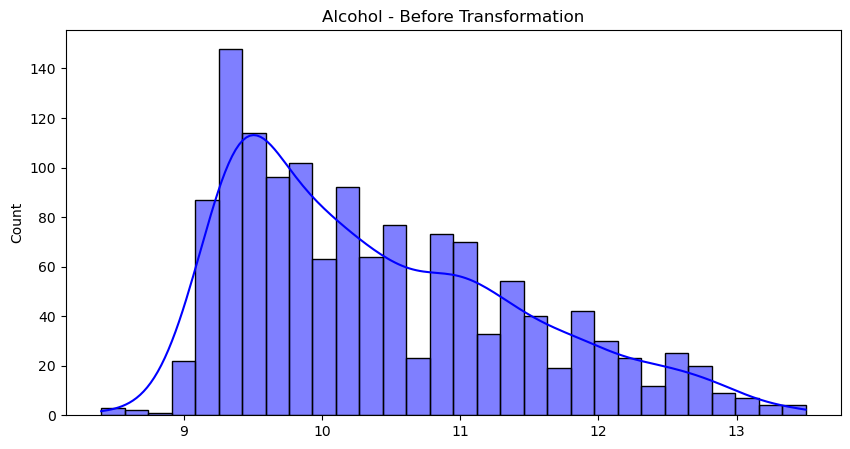

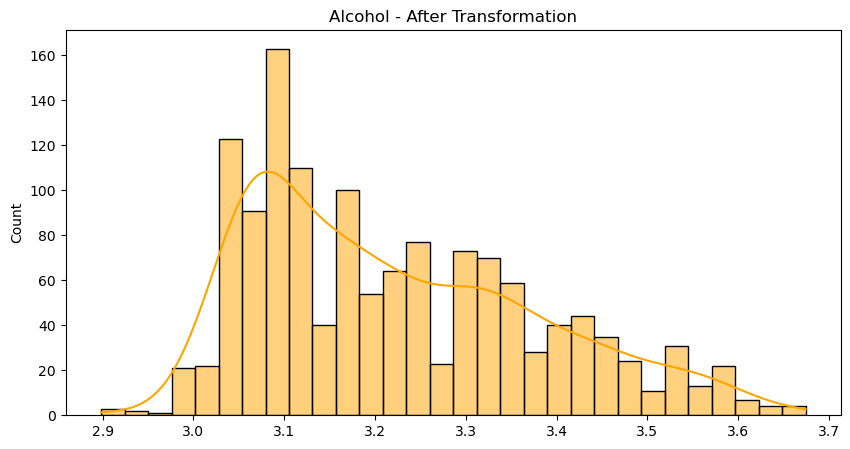

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# 'alcohol' 변수에 대한 히스토그램 그리기 (제곱근 변환 전)
plt.figure(figsize=(10, 5))
sns.histplot(df2_A['alcohol'], bins=30, kde=True, color='blue')
plt.title("Alcohol - Before Transformation")
plt.xlabel('')
plt.show()

# 'alcohol' 변수에 대한 히스토그램 그리기 (제곱근 변환 후)
plt.figure(figsize=(10, 5))
sns.histplot(df2_A_sqrt['alcohol'], bins=30, kde=True, color='orange')
plt.title("Alcohol - After Transformation")
plt.xlabel('')
plt.show()


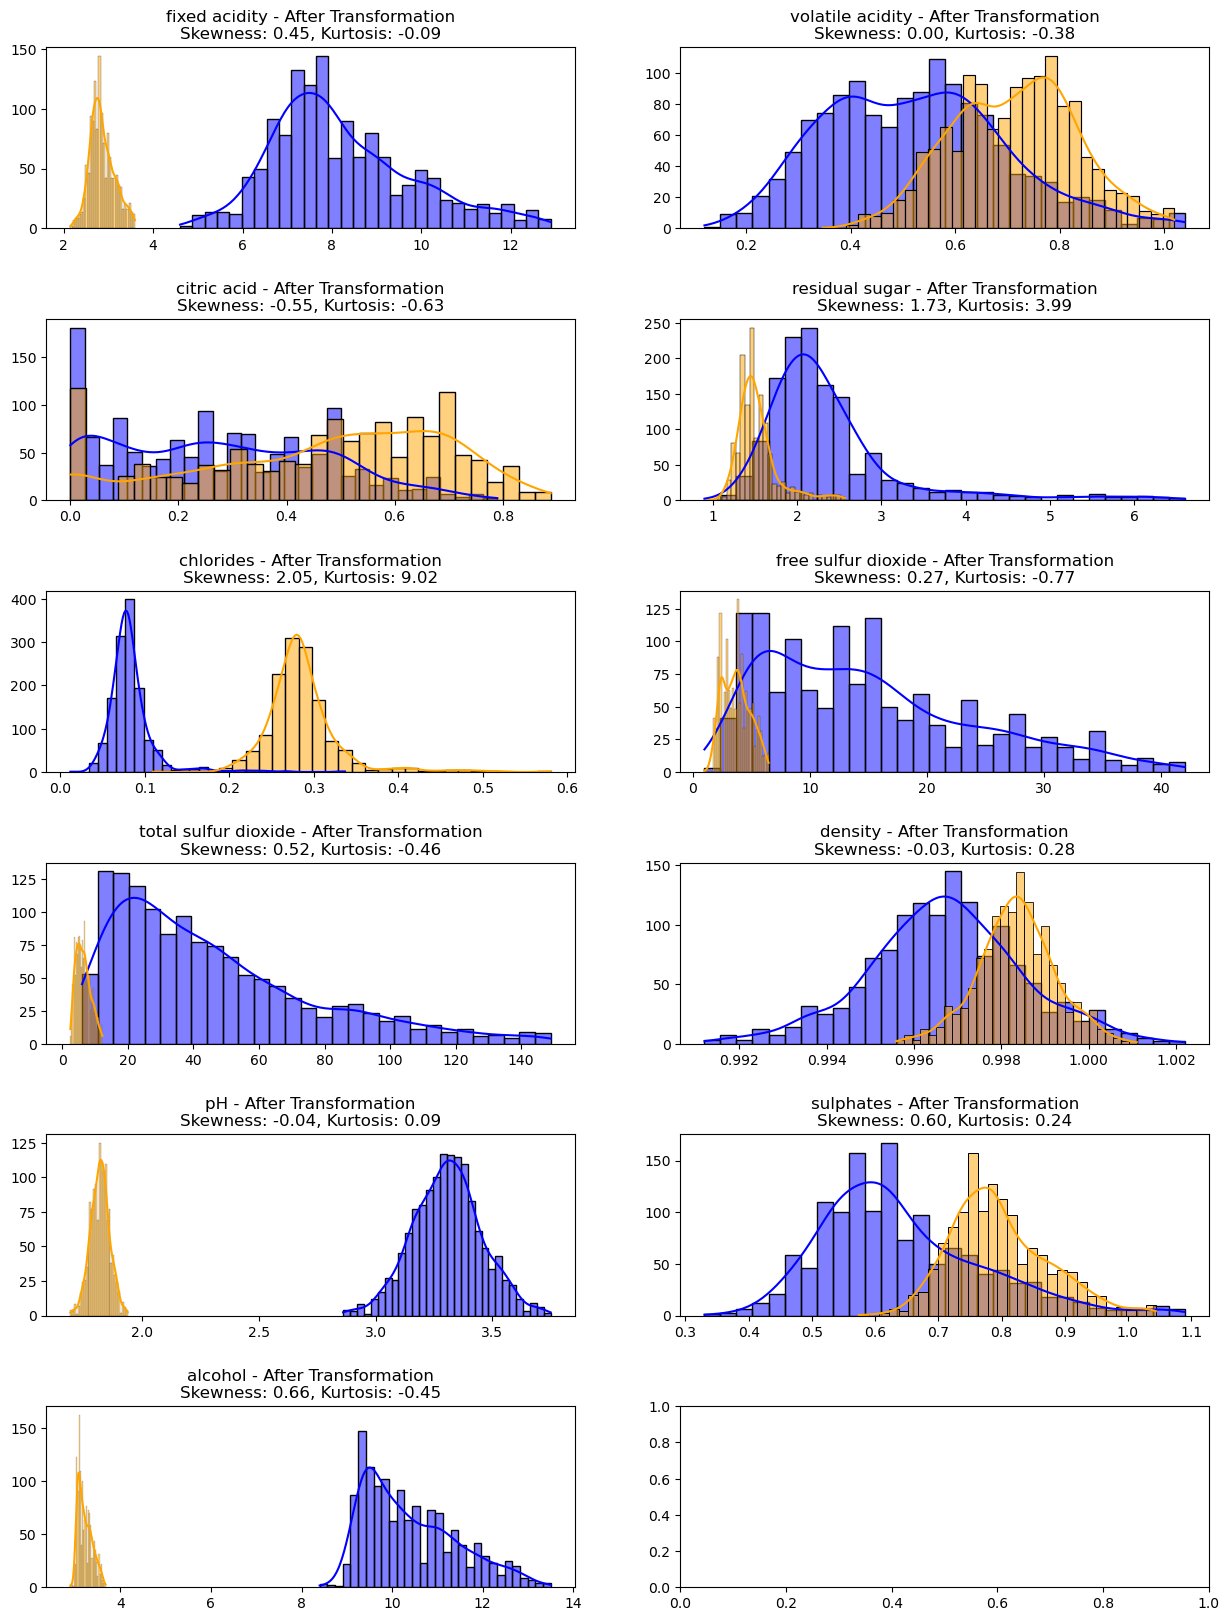

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# 플롯할 열 수 및 행 수 설정
num_cols = 2
num_rows = len(df2_A.columns) // num_cols + (1 if len(df2_A.columns) % num_cols > 0 else 0)

# 플롯 설정
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 20))
fig.subplots_adjust(hspace=0.5)

# 각 변수에 대한 히스토그램 그리기
for i, column in enumerate(df2_A.columns):
    ax = axes.flatten()[i]
    
    # 제곱근 변환 전
    sns.histplot(df2_A[column], bins=30, kde=True, color='blue', ax=ax)
    ax.set_title(f"{column} - Before Transformation\nSkewness: {skewness_result_before[column]:.2f}, Kurtosis: {kurtosis_result_before[column]:.2f}")
    ax.set_xlabel('')
    ax.set_ylabel('')
    
    # 제곱근 변환 후
    sns.histplot(df2_A_sqrt[column], bins=30, kde=True, color='orange', ax=ax)
    ax.set_title(f"{column} - After Transformation\nSkewness: {skewness_result_after[column]:.2f}, Kurtosis: {kurtosis_result_after[column]:.2f}")
    ax.set_xlabel('')
    ax.set_ylabel('')


plt.show()


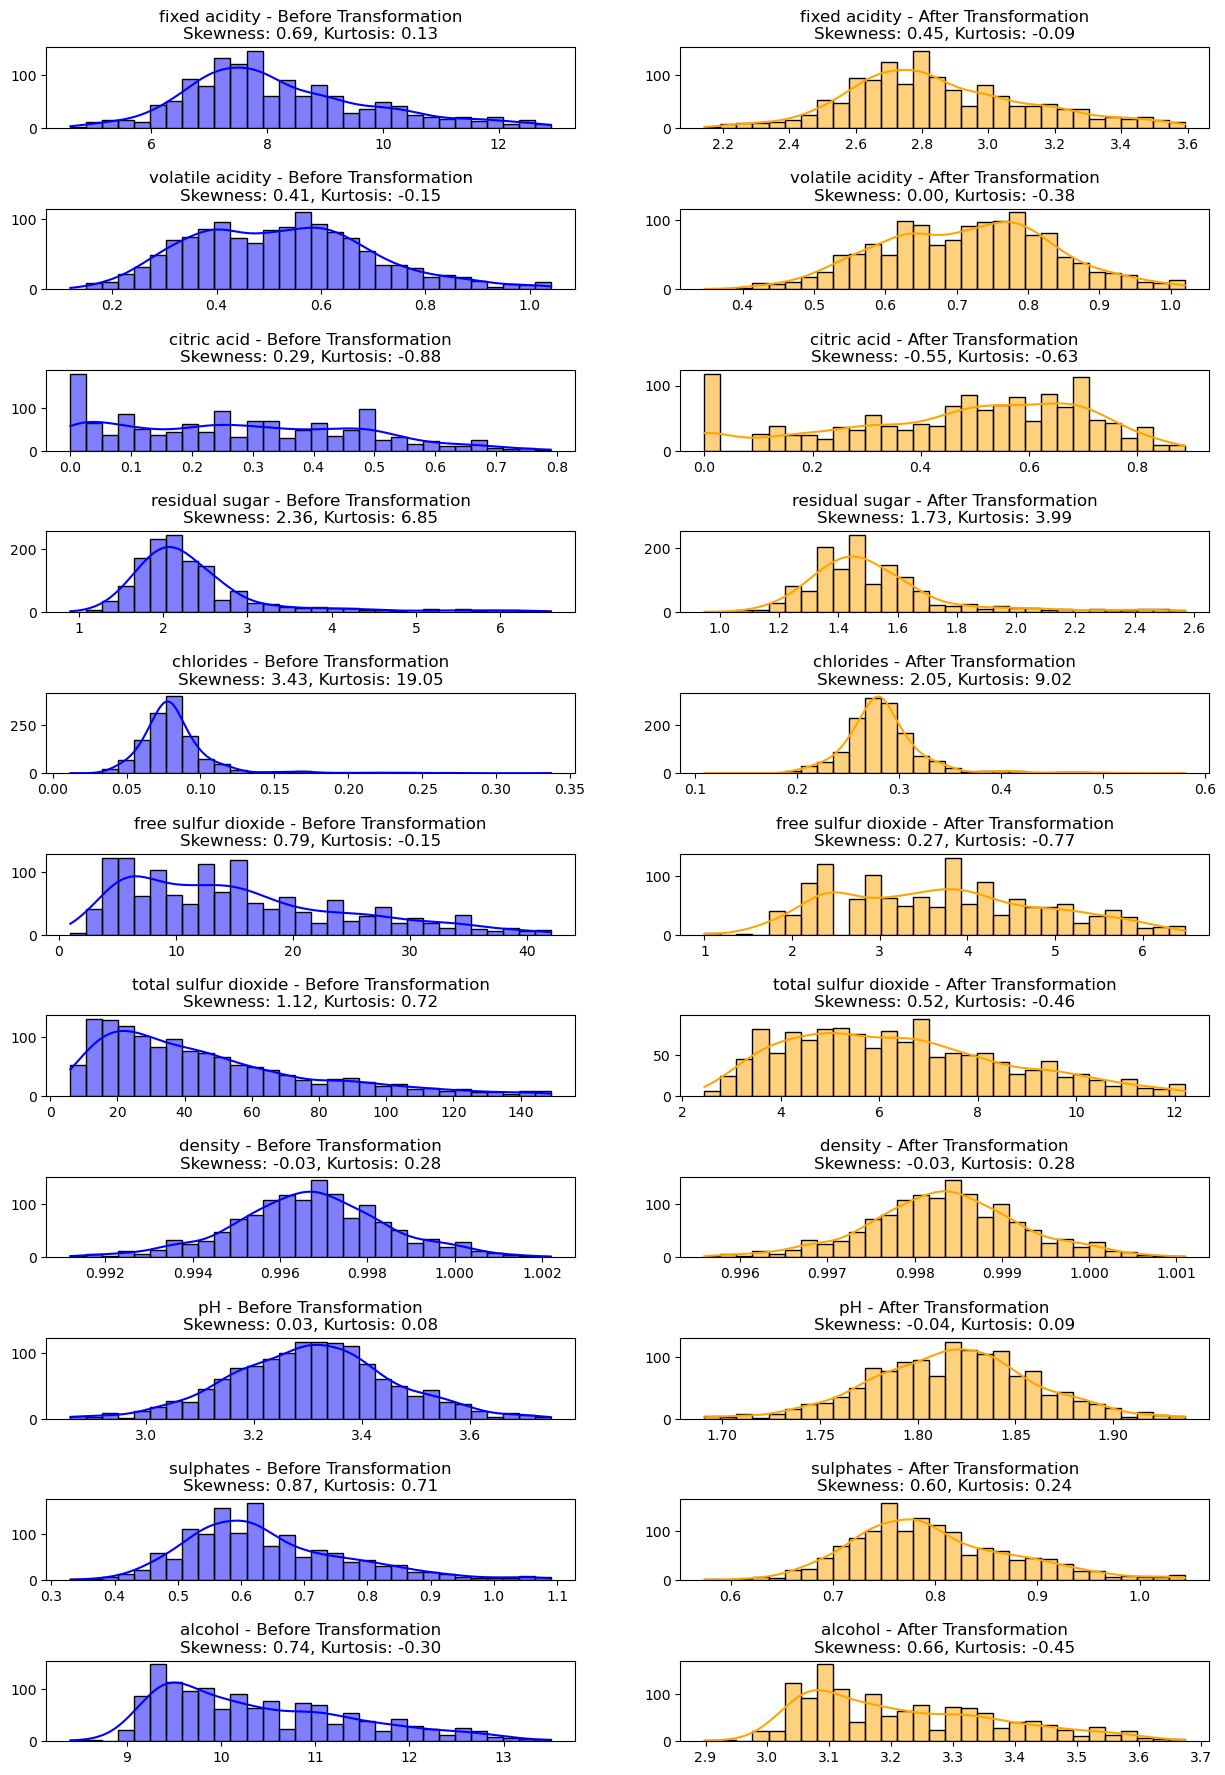

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# 플롯 설정
fig, axes = plt.subplots(len(df2_A.columns), 2, figsize=(15, 2 * len(df2_A.columns)))
fig.subplots_adjust(hspace=1.0)

# 각 변수에 대한 히스토그램 그리기
for i, column in enumerate(df2_A.columns):
    # 제곱근 변환 전
    sns.histplot(df2_A[column], bins=30, kde=True, color='blue', ax=axes[i, 0])
    axes[i, 0].set_title(f"{column} - Before Transformation\nSkewness: {skewness_result_before[column]:.2f}, Kurtosis: {kurtosis_result_before[column]:.2f}")
    axes[i, 0].set_xlabel('')
    axes[i, 0].set_ylabel('')
    
    # 제곱근 변환 후
    sns.histplot(df2_A_sqrt[column], bins=30, kde=True, color='orange', ax=axes[i, 1])
    axes[i, 1].set_title(f"{column} - After Transformation\nSkewness: {skewness_result_after[column]:.2f}, Kurtosis: {kurtosis_result_after[column]:.2f}")
    axes[i, 1].set_xlabel('')
    axes[i, 1].set_ylabel('')

plt.show()


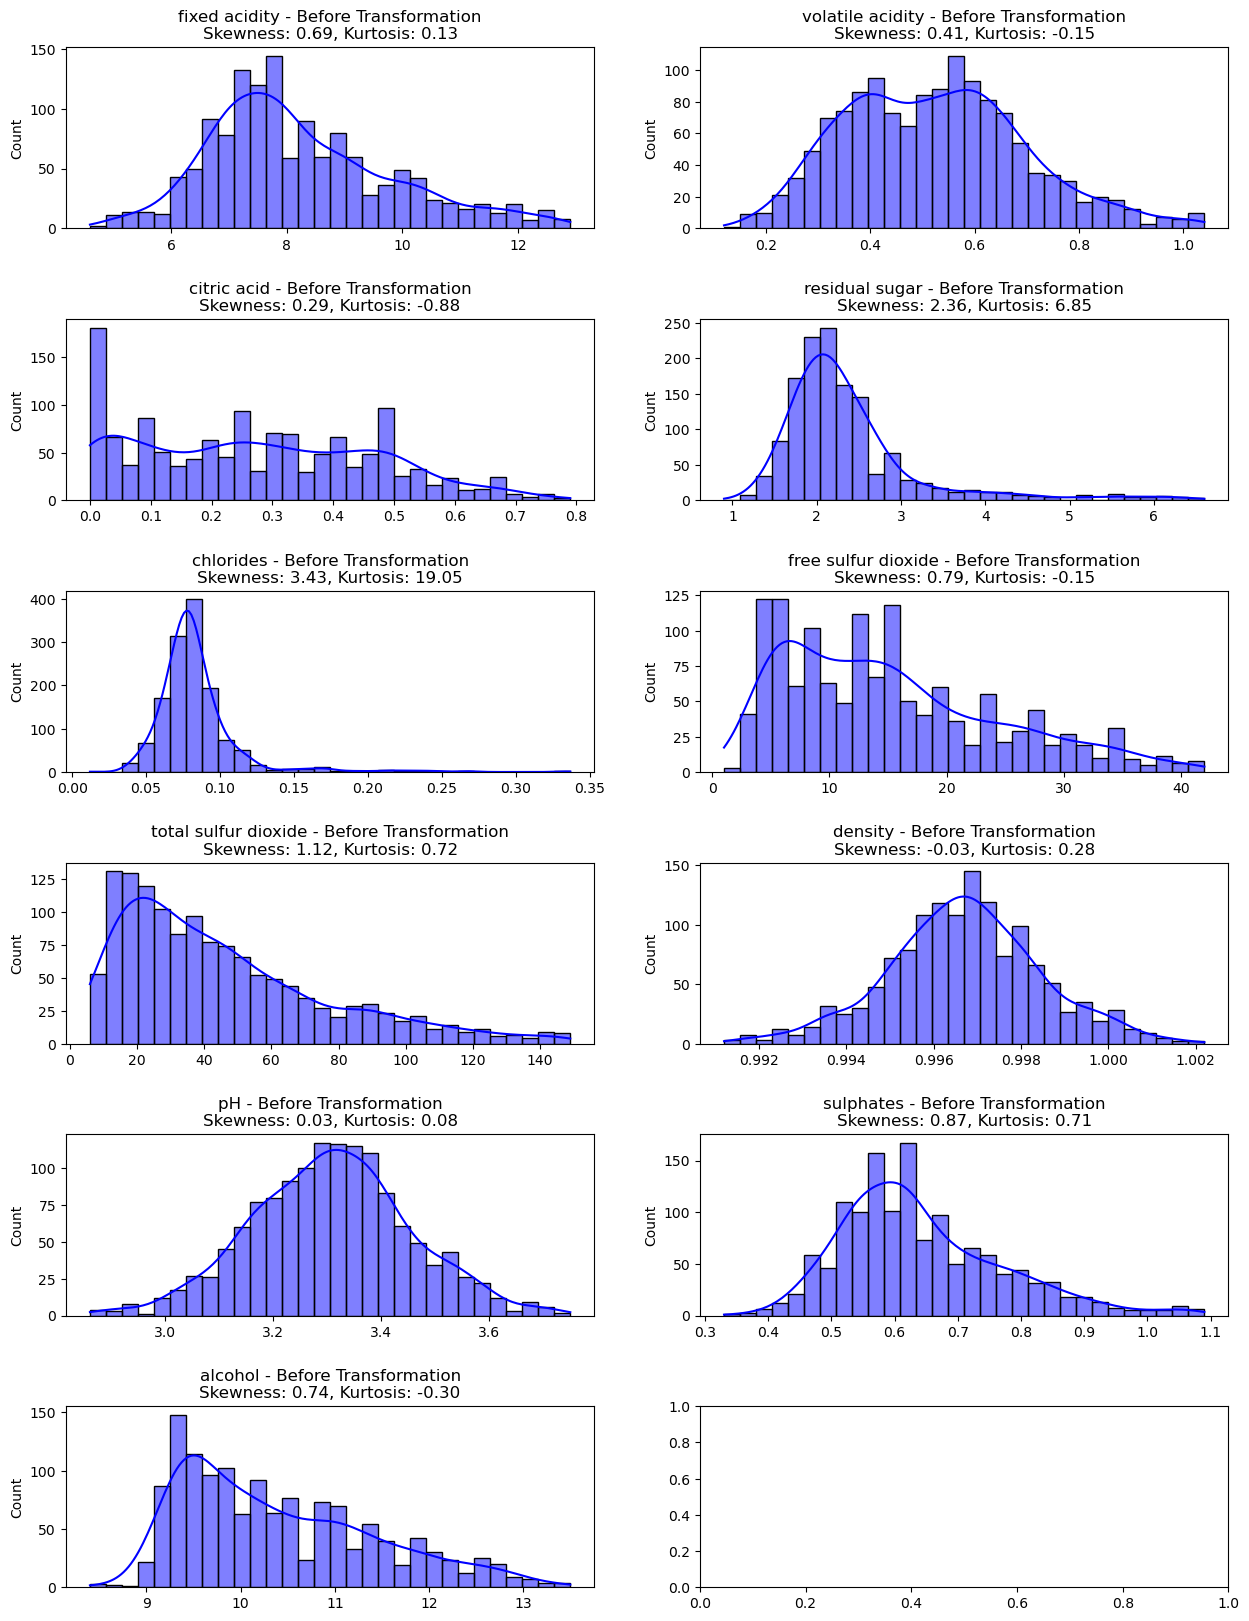

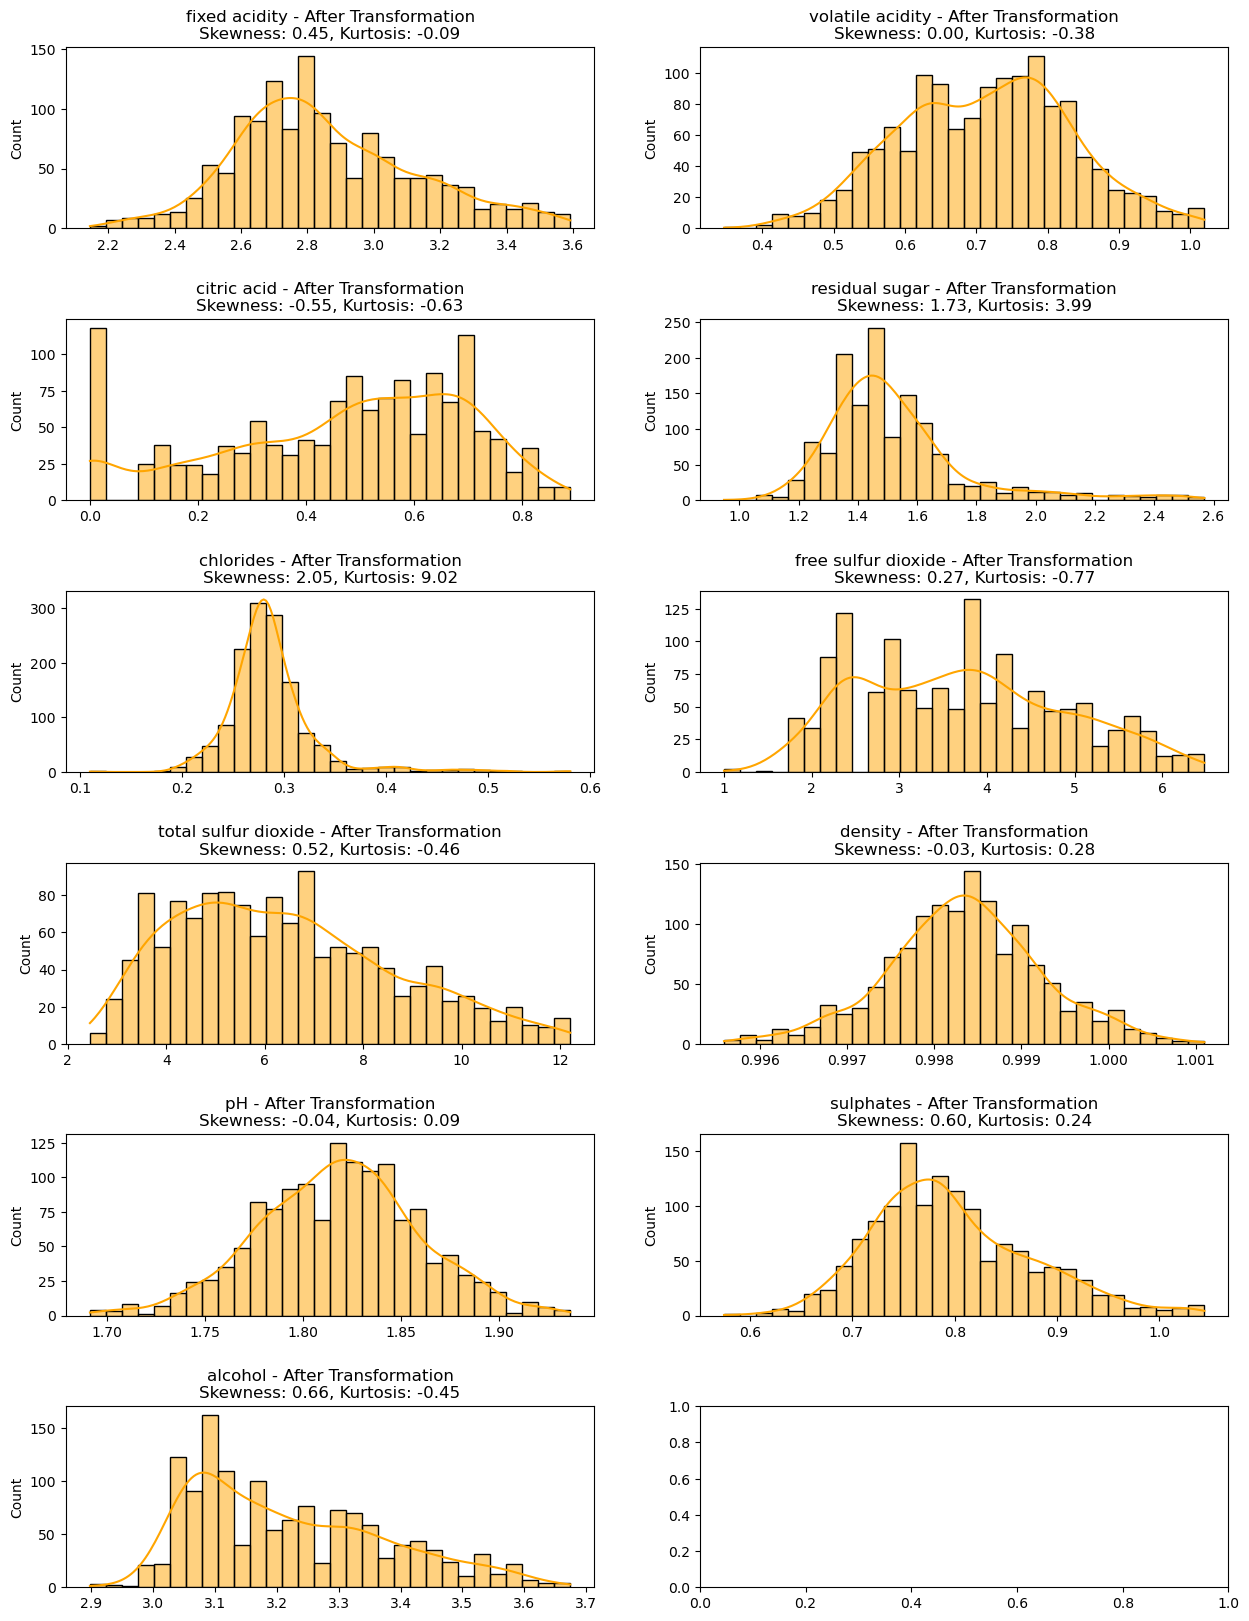

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# 히스토그램을 그릴 변수들
columns_to_plot = df2_A.columns

# 플롯할 열 수 및 행 수 설정
num_cols = 2
num_rows = len(columns_to_plot) // num_cols + (1 if len(columns_to_plot) % num_cols > 0 else 0)

# 플롯 설정
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 20))
fig.subplots_adjust(hspace=0.5)

# 각 변수에 대한 히스토그램 그리기
for i, column in enumerate(columns_to_plot):
    ax = axes.flatten()[i]
    
    # 제곱근 변환 전
    sns.histplot(df2_A[column], bins=30, kde=True, color='blue', ax=ax)
    ax.set_title(f"{column} - Before Transformation\nSkewness: {skewness_result_before[column]:.2f}, Kurtosis: {kurtosis_result_before[column]:.2f}")
    ax.set_xlabel('')
    
plt.show()

# 플롯 설정
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 20))
fig.subplots_adjust(hspace=0.5)

# 각 변수에 대한 히스토그램 그리기
for i, column in enumerate(columns_to_plot):
    ax = axes.flatten()[i]
    
    # 제곱근 변환 후
    sns.histplot(df2_A_sqrt[column], bins=30, kde=True, color='orange', ax=ax)
    ax.set_title(f"{column} - After Transformation\nSkewness: {skewness_result_after[column]:.2f}, Kurtosis: {kurtosis_result_after[column]:.2f}")
    ax.set_xlabel('')

plt.show()



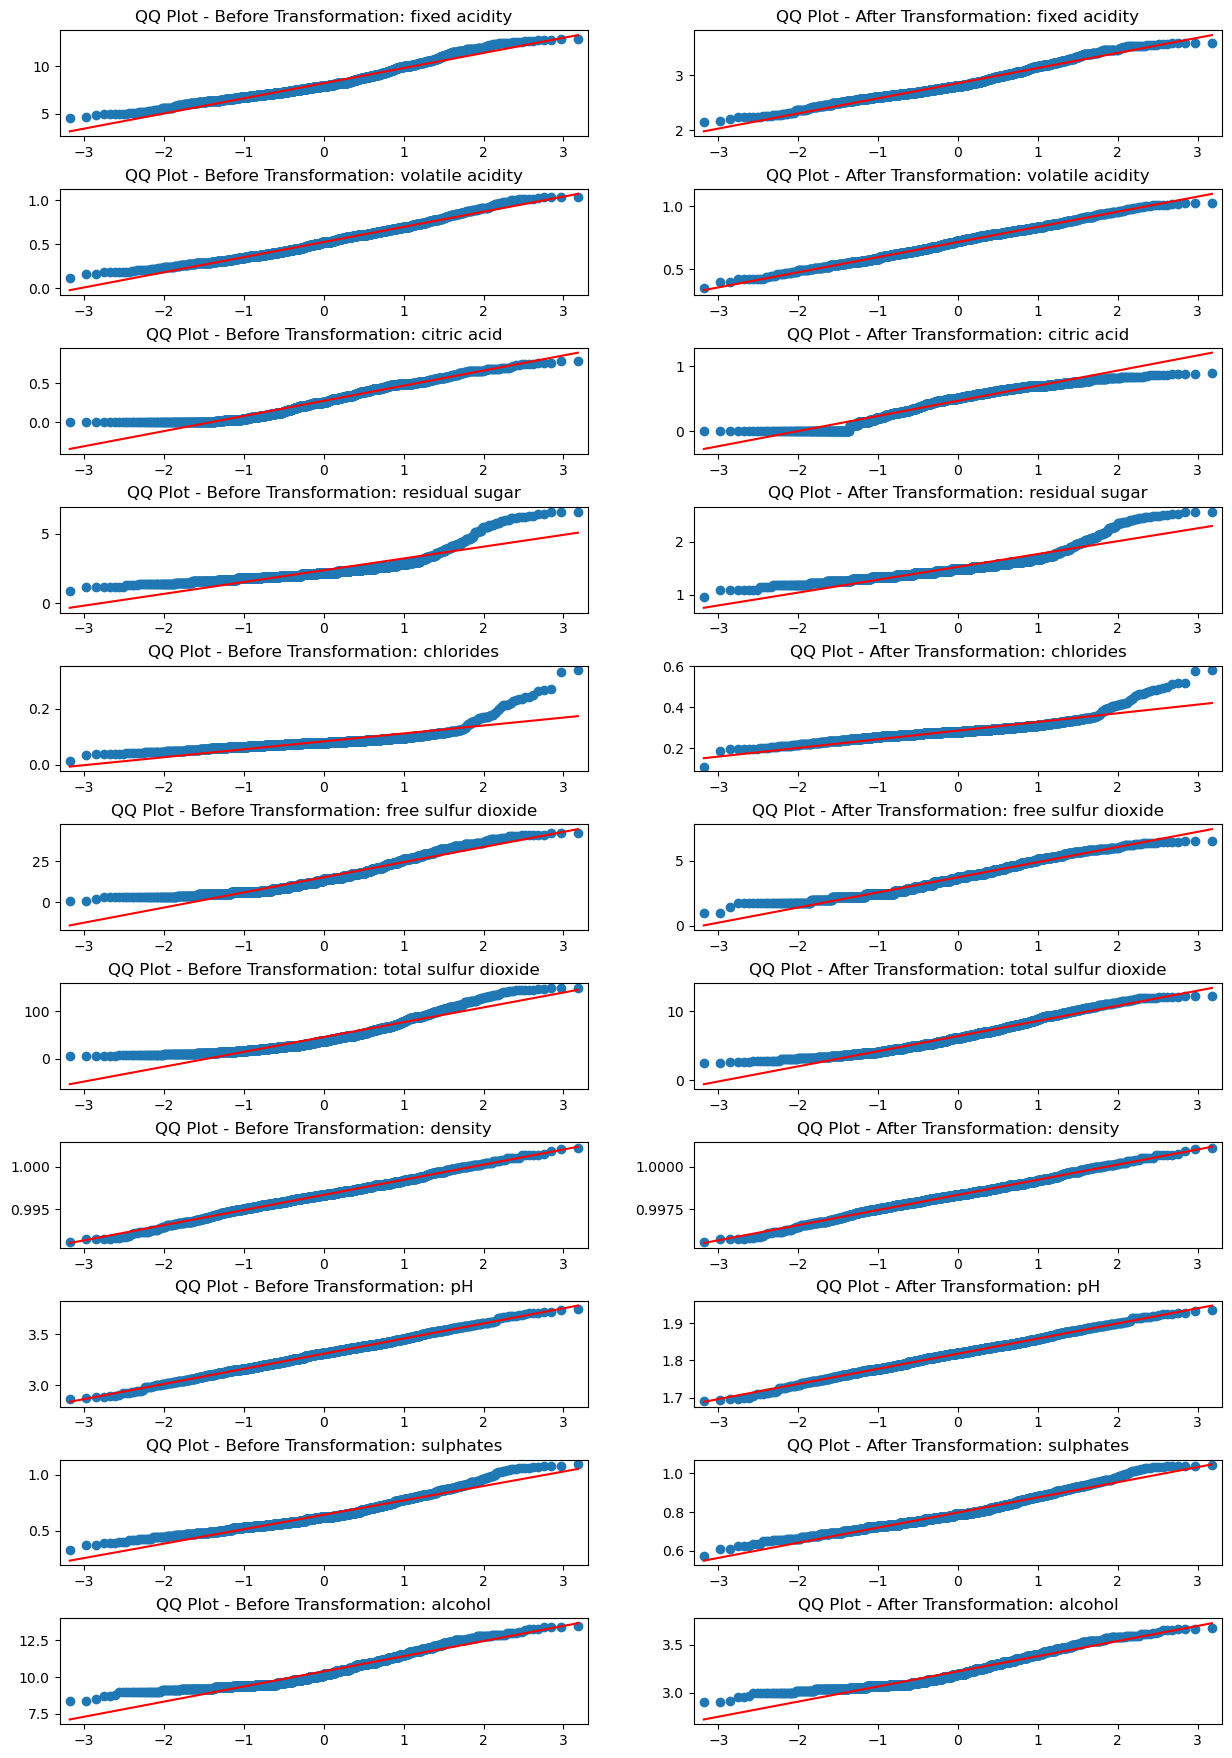

In [49]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# 플롯 설정
fig, axes = plt.subplots(len(df2_A.columns), 2, figsize=(15, 2 * len(df2_A.columns)))
fig.subplots_adjust(hspace=0.5)

# 각 변수에 대한 QQ 플롯 그리기
for i, column in enumerate(df2_A.columns):
    # 제곱근 변환 전
    sm.qqplot(df2_A[column], line='s', ax=axes[i, 0])
    axes[i, 0].set_title(f"QQ Plot - Before Transformation: {column}")
    axes[i, 0].set_xlabel('')
    axes[i, 0].set_ylabel('')

    # 제곱근 변환 후
    sm.qqplot(df2_A_sqrt[column], line='s', ax=axes[i, 1])
    axes[i, 1].set_title(f"QQ Plot - After Transformation: {column}")
    axes[i, 1].set_xlabel('')
    axes[i, 1].set_ylabel('')

plt.show()



In [50]:
from scipy.stats import shapiro

for column in df2_A.columns:
    _, p_before = shapiro(df2_A[column])
    _, p_after = shapiro(df2_A_sqrt[column])
    
    print(f"{column}:")
    print(f"  - Before Transformation: p-value = {p_before:.4f}")
    print(f"  - After Transformation: p-value = {p_after:.4f}")
    print()


fixed acidity:
  - Before Transformation: p-value = 0.0000
  - After Transformation: p-value = 0.0000

volatile acidity:
  - Before Transformation: p-value = 0.0000
  - After Transformation: p-value = 0.0004

citric acid:
  - Before Transformation: p-value = 0.0000
  - After Transformation: p-value = 0.0000

residual sugar:
  - Before Transformation: p-value = 0.0000
  - After Transformation: p-value = 0.0000

chlorides:
  - Before Transformation: p-value = 0.0000
  - After Transformation: p-value = 0.0000

free sulfur dioxide:
  - Before Transformation: p-value = 0.0000
  - After Transformation: p-value = 0.0000

total sulfur dioxide:
  - Before Transformation: p-value = 0.0000
  - After Transformation: p-value = 0.0000

density:
  - Before Transformation: p-value = 0.0012
  - After Transformation: p-value = 0.0012

pH:
  - Before Transformation: p-value = 0.0747
  - After Transformation: p-value = 0.0662

sulphates:
  - Before Transformation: p-value = 0.0000
  - After Transformation

- Shapiro-Wilk 검정 결과를 살펴보면, 각 변수에 대해 제곱근 변환 전과 후에도 p-value가 0.05보다 작아 정규 분포를 따르지 않는 것으로 나타났습니다. 따라서 제곱근 변환 후에도 정규성 가정이 만족되지 않는 것으로 보입니다.
- 결과적으로 제곱근 변환은 옳지 않은것 같다.